Create CNN Model and Optimize it using Keras Tune

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=30ad5261131b3cb7de126c43632083f6729327190143dab94c6d125c444c7769
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=5842e1e4f6c63442df63391a12043c5af9dffb030d29fc47aecf789976bee955
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
print(tf.__version__)

2.4.0


In [4]:
data= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
(x_train, y_train), (x_test, y_test)= data

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
x_train= x_train/255
x_test= x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_train[0]

9

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

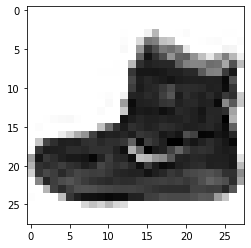

In [13]:
plt.imshow(x_train[0], cmap='gray_r')

In [14]:
x_train[0].shape

(28, 28)

In [15]:
x_train= x_train.reshape(len(x_train),28,28,1)
x_test= x_test.reshape(len(x_test),28,28,1)

In [16]:
x_train[0].shape

(28, 28, 1)

In [17]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [18]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters 

In [19]:
tuner= RandomSearch(build_model, objective= 'val_accuracy', max_trials=4, directory= 'result',project_name= 'Fashion')

In [20]:
tuner.search(x_train, y_train, epochs= 3, validation_split= 0.2)

Trial 4 Complete [00h 00m 18s]
val_accuracy: 0.871749997138977

Best val_accuracy So Far: 0.9129999876022339
Total elapsed time: 00h 01m 20s
INFO:tensorflow:Oracle triggered exit


In [22]:
model= tuner.get_best_models(num_models=1)[0]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        27680     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,209,002
Trainable params: 1,209,002
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, epochs= 10, validation_split= 0.2, initial_epoch= 3)

Epoch 4/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1395 - accuracy: 0.9481 - val_loss: 0.2562 - val_accuracy: 0.9121
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0995 - accuracy: 0.9628 - val_loss: 0.2899 - val_accuracy: 0.9103
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0684 - accuracy: 0.9744 - val_loss: 0.3352 - val_accuracy: 0.9098
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.3817 - val_accuracy: 0.9104
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9871 - val_loss: 0.4575 - val_accuracy: 0.9120
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0247 - accuracy: 0.9910 - val_loss: 0.4698 - val_accuracy: 0.9083
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.5084 - val_accuracy